In [1]:
%%bash 
pip install requests

In [7]:
import requests
import numpy as np

In [11]:
flats = []

In [12]:
for i in range (1,6):
    resp = requests.get(f"https://www.nestpick.com/search/api/?bedrooms=2&city=amsterdam&order=relevance&page={i}&type=apartment&currency=EUR&location=101751893")
    data = resp.json()["items"]
    flats.extend([int(v["normalized_price"]) for v in data])
flats

[3500,
 1495,
 3700,
 3575,
 3800,
 2500,
 4000,
 2400,
 3825,
 2600,
 1800,
 2100,
 4750,
 2500,
 4750,
 1950,
 4750,
 3575,
 4750,
 1999,
 2100,
 1970,
 2500,
 2400,
 5000,
 2400,
 4750,
 2450,
 4750,
 2750,
 4750,
 2500,
 4750,
 10899,
 4750,
 4750,
 4750,
 4750,
 4750,
 8200,
 5185,
 13544,
 4800,
 7496,
 15214,
 12271,
 7729,
 15369,
 5786,
 5392,
 4800,
 4200,
 10091,
 10091]

In [13]:
f_data = np.array(flats)

In [14]:
f_data.max()

15369

In [16]:
f_data.min()

1495

In [17]:
f_data.mean()

5040.851851851852

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [34]:
df = pd.DataFrame({"price": f_data})
group = df.groupby("price").agg({"price": ["count"]})
group.columns = ["count"]
group = group.reset_index()
group.head()

,price,count
0,1495,1
1,1800,1
2,1950,1
3,1970,1
4,1999,1


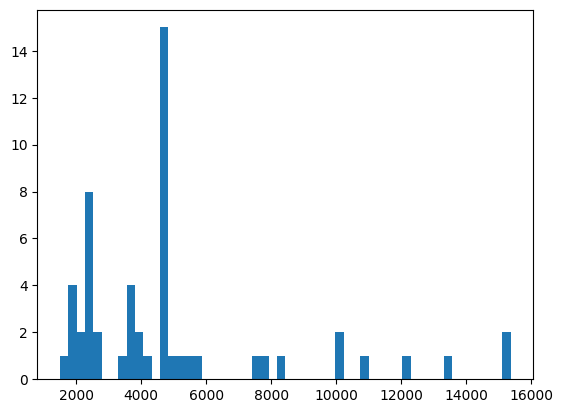

In [23]:
plt.hist(f_data, bins=54)
plt.show()

In [40]:
group.sort_values("count")

,price,count
0,1495,1
30,13544,1
29,12271,1
28,10899,1
26,8200,1
25,7729,1
24,7496,1
23,5786,1
22,5392,1
21,5185,1
